# Reproduction of results for change point detection

Sébastien MEYER, Adrienne TUYNMAN

The purpose of this notebook is to reproduce some of the results from the following paper.

**Reference**

Susanne Taina Ramalho Maciel, Marcelo Peres Rocha and Martin Schimmel. *Urban seismic monitoring in Brası́lia, Brazil*. 2021.

In [1]:
from src.models.rms import load_rms, extract_rms_signal
from src.models.hub import fit_predict
from src.utils.data import replace_df, resample_df
from src.utils.plotting import plot_rms, plot_bkps

In [2]:
# These parameters are common in the whole notebook
BAND = "4.0-14.0"

COST_NAME = "rbf"

## Load precomputed RMS data

In order to run this notebook, you will have to download the file `2020-01-displacement_RMS-Jan-Apr.csv` from [here](https://github.com/sutaina/brasiliaNoise/tree/main/data). Then, rename it `displacement_from_2020-01-01_to_2020-05-01_GT.BDFB..BHZ.csv` and put it under `data` directory.

In [3]:
data_dir = "data"

start_date = "2020-01-01"
end_date = "2020-05-01"

output = "displacement"

rms_dfs = load_rms(
    data_dir=data_dir,
    start_date=start_date,
    end_date=end_date,
    output=output,
    sep=";"
)
rms_df = rms_dfs["GT.BDFB..BHZ"]

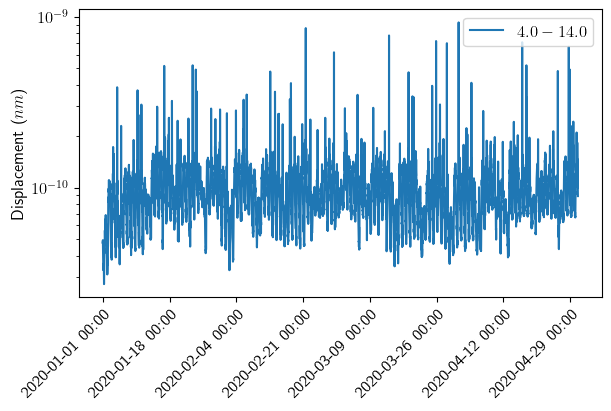

In [4]:
plot_rms(
    rms_df=rms_df,
    start_date_plot=start_date,
    end_date_plot=end_date,
    bands_plot=BAND,
    savefig=False
)

## Brazil lockdown

In 2020, as many other countries, Brazil lived under a lockdown for several months. The important dates of this event are:

- 12.03.2020: State Decree 01
- 20.03.2020: State Decree 02

We are interested in spotting the start and end dates of COVID lockdowns in Brazil.

We can make a few remarks about the displacement:

- There are a few outliers at very specific points in time.
- There is more data (one sample every 15 minutes) than required for doing change point detection.

Following the authors of the reference article, we perform the following preprocessing:

- Remove data between 9pm and 9am, as we do not expect much urban noise during this period.
- Resample data with a frequency of 12 hours, taken as the median so as to be robust to outliers.

In [5]:
between_begin = "9:00"
between_end = "21:00"
freq = "12H"

rms_df_lkdwn = resample_df(
    df=rms_df,
    between_begin=between_begin,
    between_end=between_end,
    freq=freq
)

In [6]:
start_date_signal = "2020-02-15"
end_date_signal = "2020-05-01"

important_dates = {
    "2020-03-20 06:00": "Start of statewide lockdown"
}

datelist, signal, true_bkps = extract_rms_signal(
    rms_df=rms_df_lkdwn,
    start_date_signal=start_date_signal,
    end_date_signal=end_date_signal,
    important_dates=list(important_dates.keys()),
    band=BAND
)

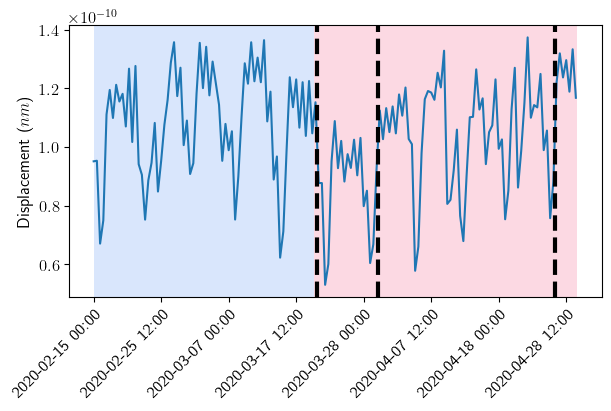

In [7]:
n_bkps = 3

pred_bkps = fit_predict(
    signal=signal,
    cost_name=COST_NAME,
    n_bkps=n_bkps
)

plot_bkps(
    signal=signal,
    true_bkps=true_bkps,
    pred_bkps=pred_bkps,
    datelist=datelist,
    savefig=False
)

As one can see [here](https://github.com/sutaina/brasiliaNoise/blob/main/CPA.jpg), we obtain the same predicted breakpoints as in the original paper. 

---